# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [6]:
insuranceDF = pd.read_csv('Healthcare Insurance Cost Prediction-Dataset.csv')

In [8]:
insuranceDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insuranceDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning and Exploratory Data Analysis

In [10]:
insuranceDF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
insuranceDF["smoker_norm"]=map_smoking(insuranceDF["smoker"])

In [20]:
nonnum_cols=[col for col in insuranceDF.select_dtypes(include=["object"])]

In [23]:
# Adding obese column
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
insuranceDF["obese"]=map_obese(insuranceDF["bmi"])

In [22]:
insuranceDF.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_int,smoker_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,27,1,0
1,18,male,33.770,1,no,southeast,1725.55230,33,0,1
2,28,male,33.000,3,no,southeast,4449.46200,33,0,1
3,33,male,22.705,0,no,northwest,21984.47061,22,0,0
4,32,male,28.880,0,no,northwest,3866.85520,28,0,0


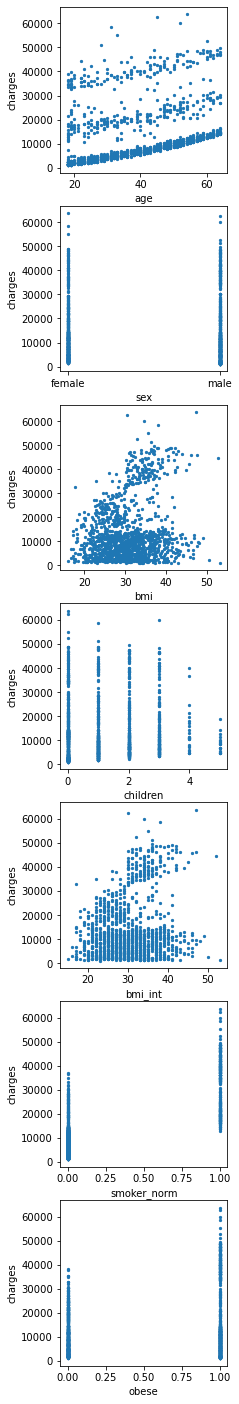

In [25]:
colnum=len(insuranceDF.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in insuranceDF.columns if i not in ["smoker","region","charges","sex_norm"]]):
    
    ax[ind].scatter(insuranceDF[col],insuranceDF.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

age :  0.29900819333064765
bmi :  0.1983409688336289
children :  0.06799822684790481
charges :  1.0
bmi_int :  0.19618775134063166
smoker_norm :  0.7872514304984775
obese :  0.19968322199588245


Text(0, 0.5, 'Absolute correlation')

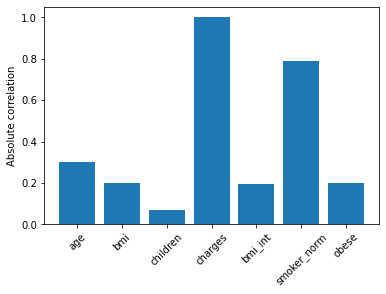

In [29]:
corr_vals=[]
collabel=[]
for col in [i for i in insuranceDF.columns if i not in nonnum_cols]:
    
    p_val=sp.stats.pearsonr(insuranceDF[col],insuranceDF["charges"])
    corr_vals.append(np.abs(p_val[0]))
    print(col,": ",np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

Exploratory Data Analysis


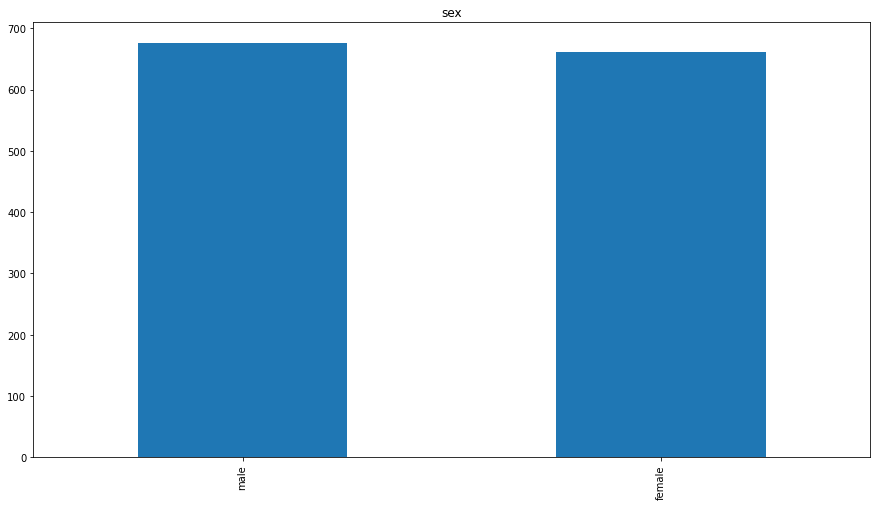

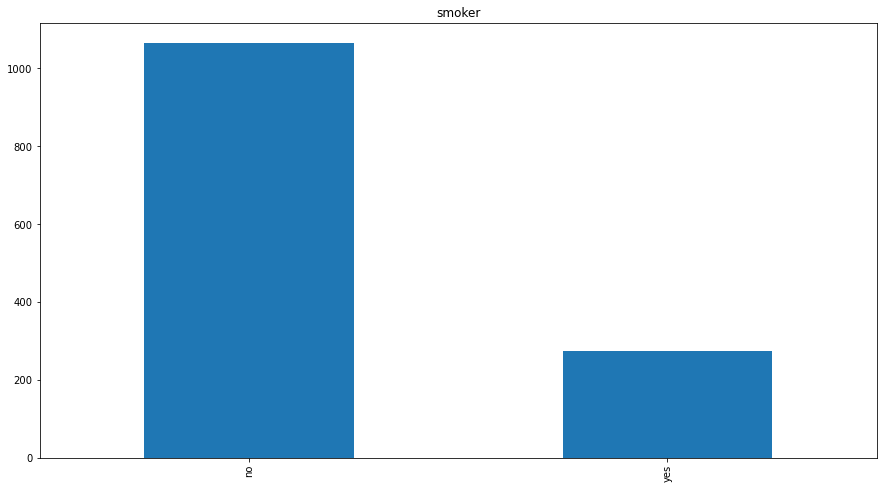

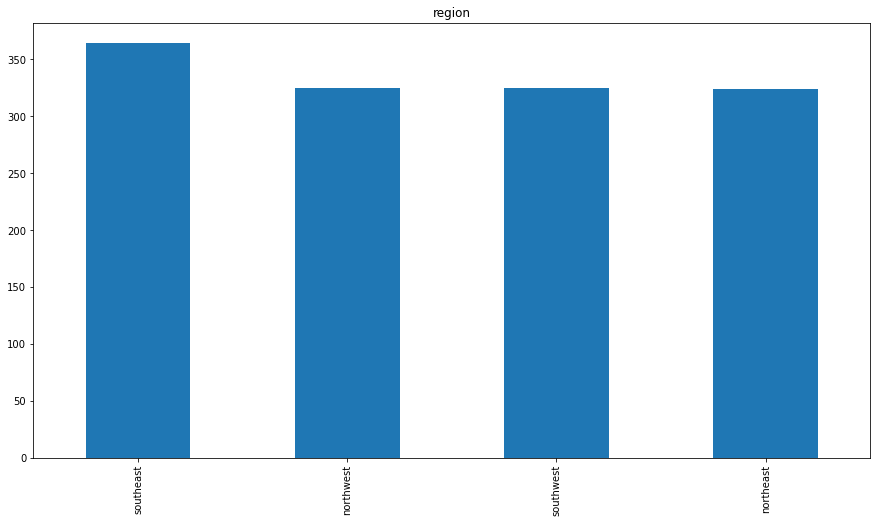

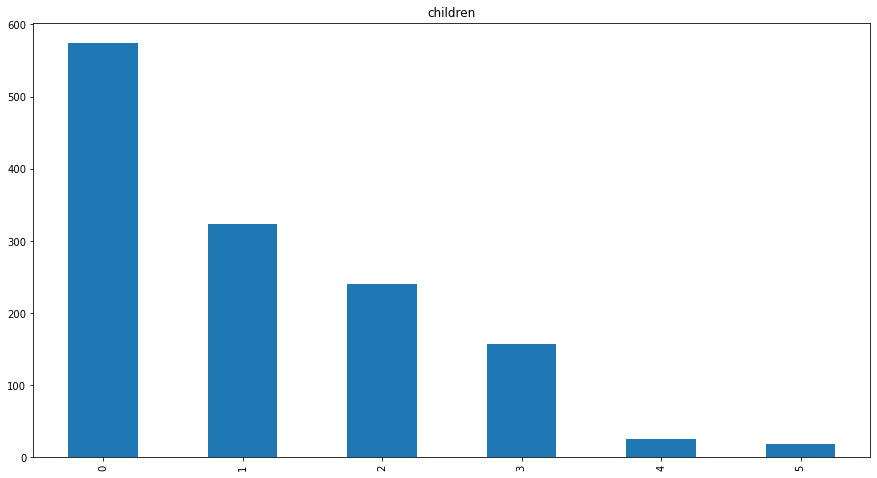

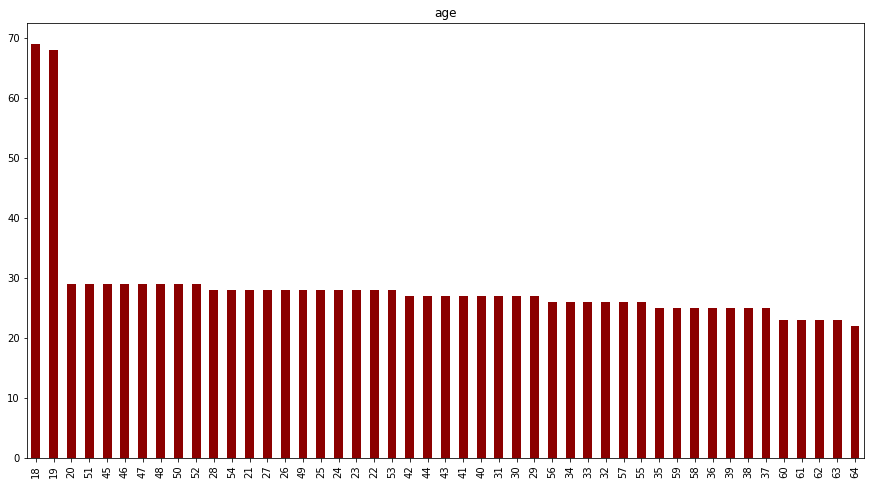

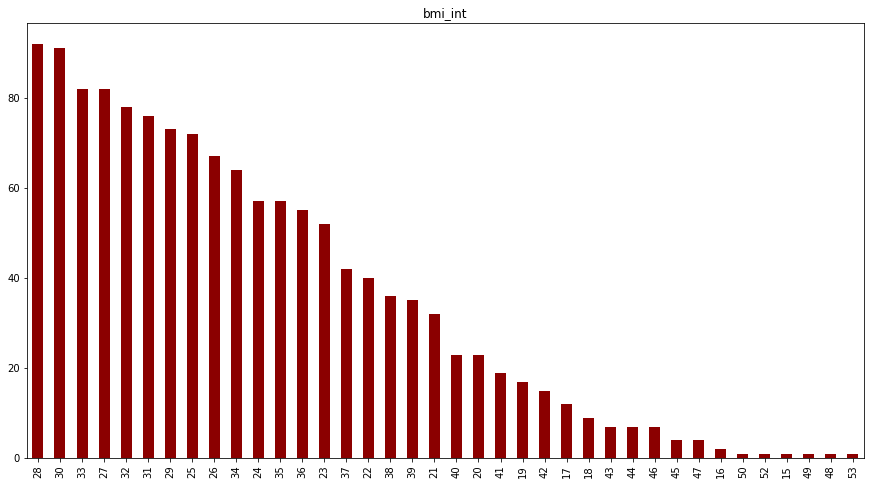

In [12]:
insuranceDF['bmi_int'] = insuranceDF['bmi'].apply(lambda x: int(x))
variables_1 = ['sex','smoker','region','children',]
variables_2 = ['age','bmi_int']
# data distribution analysys
print('Exploratory Data Analysis')
for v in variables_1:
    imsuranceDF = insuranceDF.sort_values(by=[v])
    insuranceDF[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    plt.show()
for v in variables_2:
    imsuranceDF = insuranceDF.sort_values(by=[v])
    insuranceDF[v].value_counts().plot(kind = 'bar', color='darkred')
    plt.title(v)
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    plt.show()

Text(0.5, 1.0, 'Plot for Charges & Age')

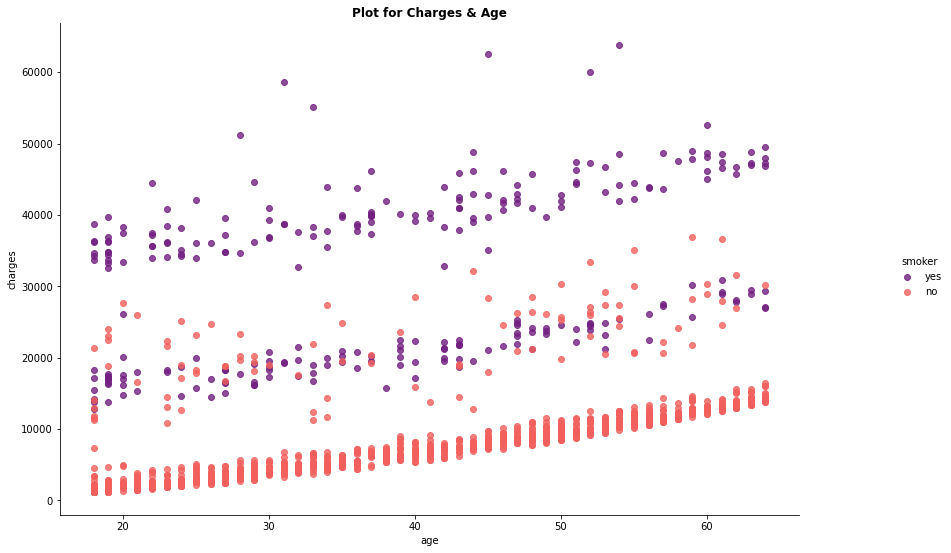

In [15]:
sns.lmplot(x='age', y='charges', hue='smoker',data= insuranceDF,fit_reg=False,palette="magma")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Age", weight='bold')

Text(0.5, 1.0, 'Plot for Charges & BMI')

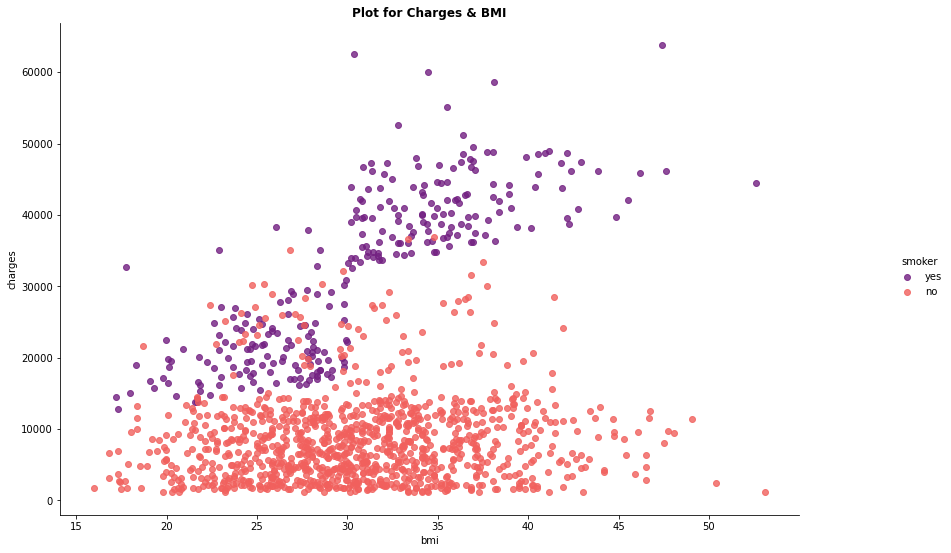

In [16]:
sns.lmplot(x='bmi', y='charges', hue='smoker',data= insuranceDF,fit_reg=False,palette="magma")
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & BMI", weight='bold')

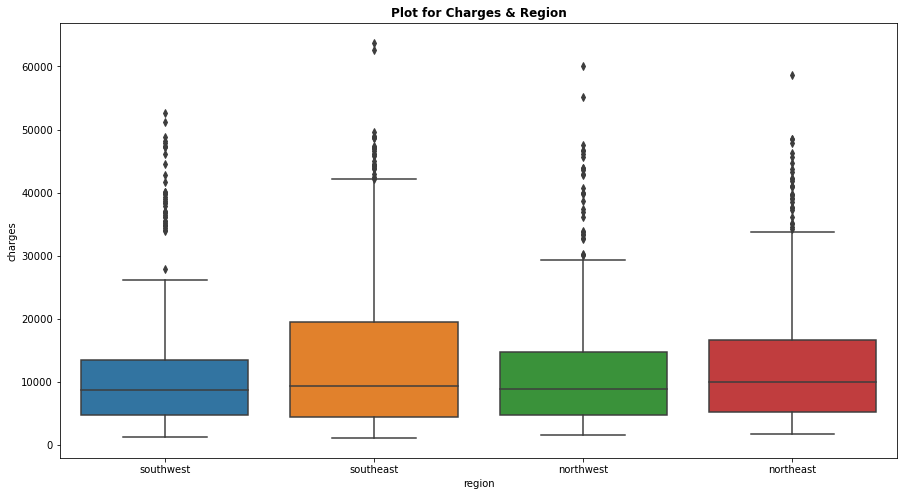

In [30]:
sns.boxplot(x = "region", y = "charges", data = insuranceDF)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & Region", weight='bold')
plt.show()

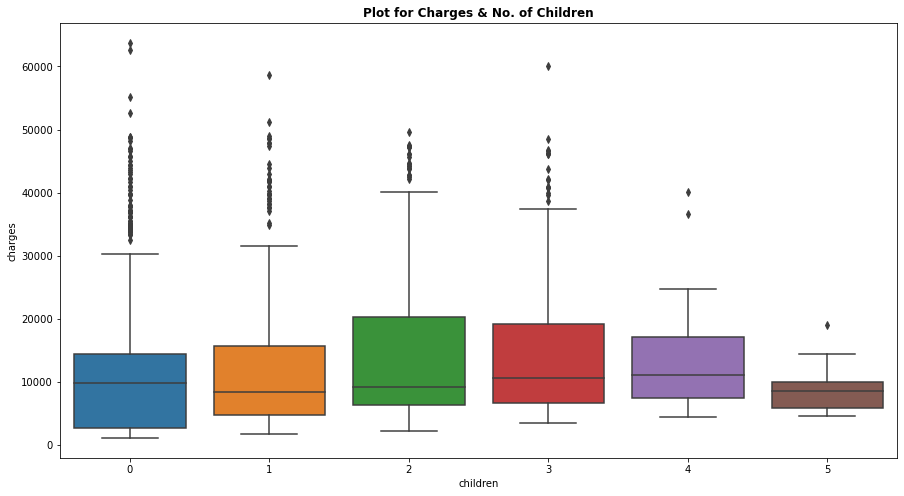

In [32]:
sns.boxplot(x = "children", y = "charges", data = insuranceDF)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Plot for Charges & No. of Children", weight='bold')
plt.show()

## Correlation Matrix

In [33]:
insuranceCor=insuranceDF.corr()
print(insuranceCor)

                  age       bmi  children   charges   bmi_int  smoker_norm  \
age          1.000000  0.109272  0.042469  0.299008  0.108437    -0.025019   
bmi          0.109272  1.000000  0.012759  0.198341  0.998883     0.003750   
children     0.042469  0.012759  1.000000  0.067998  0.011097     0.007673   
charges      0.299008  0.198341  0.067998  1.000000  0.196188     0.787251   
bmi_int      0.108437  0.998883  0.011097  0.196188  1.000000     0.001669   
smoker_norm -0.025019  0.003750  0.007673  0.787251  0.001669     1.000000   
obese        0.086764  0.799404  0.011283  0.199683  0.801714    -0.001381   

                obese  
age          0.086764  
bmi          0.799404  
children     0.011283  
charges      0.199683  
bmi_int      0.801714  
smoker_norm -0.001381  
obese        1.000000  


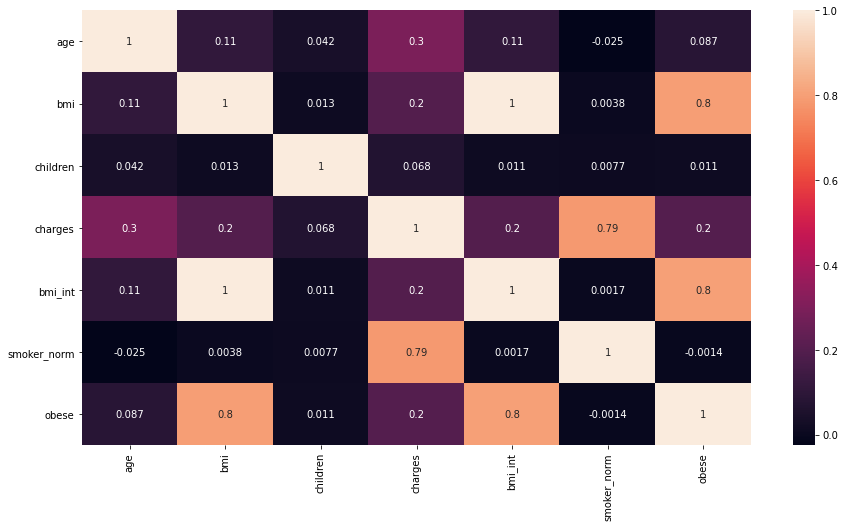

In [34]:
cat=insuranceDF.select_dtypes(include="object").columns
num=insuranceDF.select_dtypes(exclude="object").columns
sns.heatmap(insuranceCor, 
        xticklabels=insuranceCor.columns,
        yticklabels=insuranceCor.columns,annot=True,cbar=True)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

### We can see that bmi-charges and age-charges are highly correlated
### Also there is high correlation between bmi and obese
### There is a positive correlation between charges and smoker as well.

In [39]:
tab1=pd.crosstab(insuranceDF['smoker'], insuranceDF['sex'])
print(tab1)

sex     female  male
smoker              
no         547   517
yes        115   159


In [41]:
#Implementation of Chi -Squared test which is a part of scipy.stats package
import scipy.stats as st
#st.chi2_contingency(_)

stat, p, dof, expected = st.chi2_contingency(tab1)
print('dof=%f' % dof)
print('pvalue=%f' % p)
print('stats=%f' % stat)
print(expected)

dof=1.000000
pvalue=0.006548
stats=7.392911
[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


As per above test, P value is very small(0.006548). Hence, we reject the null hypothesis that smoker and sex are independent. This can also be crossed checked with our data exploratory analysis which says that males are more common smokers then females and so higher charges are assocciated with them.

## Linear Regression


In [43]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='charges ~ bmi', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

Coefficients: 

 Intercept    1192.937209
bmi           393.873031
dtype: float64

 Pvalues: 

 Intercept    4.737685e-01
bmi          2.459086e-13
dtype: float64

 R Squared: 

 0.03933913991786264


### Interpretation: Increase of Bmi by 1 unit increases annual charges of $393.87 

In [44]:
#Linear regression for smoker
lm = smf.ols(formula='charges ~ smoker', data=insuranceDF).fit()
print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

Coefficients: 

 Intercept         8434.268298
smoker[T.yes]    23615.963534
dtype: float64

 Pvalues: 

 Intercept        1.581020e-205
smoker[T.yes]    8.271436e-283
dtype: float64

 R Squared: 

 0.6197648148218988


### Interpretation: Being a smoker increases charges by $23,615.96 annually

In [46]:
lm = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age', data=insuranceDF).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

print(lm.summary())p-value: Small p values suggests likely to have relationship with charges and the coefficient is not zero. Indicates statistically significant. Many of the features are statistically significant, so it’s not a concern

Multiple R-squared: This is a measure of how much of variation is explained by the model. In this case, 75% of the variation is explained by the dependent variable.

Coefficients: 

 Intercept             -11938.538576
sex[T.male]             -131.314359
region[T.northwest]     -352.963899
region[T.southeast]    -1035.022049
region[T.southwest]     -960.050991
smoker[T.yes]          23848.534542
bmi                      339.193454
children                 475.500545
age                      256.856353
dtype: float64

 Pvalues: 

 Intercept              5.579044e-32
sex[T.male]            6.933475e-01
region[T.northwest]    4.587689e-01
region[T.southeast]    3.078174e-02
region[T.southwest]    4.476493e-02
smoker[T.yes]          0.000000e+00
bmi                    6.498194e-31
children               5.769682e-04
age                    7.783217e-89
dtype: float64

 R Squared: 

 0.7509130345985207
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:            

#### p-value: Small p values suggests likely to have relationship with charges and the coefficient is not zero. Indicates statistically significant. Many of the features are statistically significant, so it’s not a concern

#### Multiple R-squared: This is a measure of how much of variation is explained by the model. In this case, 75% of the variation is explained by the dependent variable.

## Improving the model

In [47]:
insuranceDF['age2'] = insuranceDF['age']**2
print(insuranceDF.head())

   age     sex     bmi  children smoker     region      charges  bmi_int  \
0   19  female  27.900         0    yes  southwest  16884.92400       27   
1   18    male  33.770         1     no  southeast   1725.55230       33   
2   28    male  33.000         3     no  southeast   4449.46200       33   
3   33    male  22.705         0     no  northwest  21984.47061       22   
4   32    male  28.880         0     no  northwest   3866.85520       28   

   smoker_norm  obese bmi30  age2  
0            1      0     0   361  
1            0      1     1   324  
2            0      1     1   784  
3            0      0     0  1089  
4            0      0     0  1024  


In [48]:
insuranceDF['age2'] = insuranceDF['age']**2
lm = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age2', data=insuranceDF).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm.params)
print("\n Pvalues: \n\n",lm.pvalues)
print("\n R Squared: \n\n",lm.rsquared)

print(lm.summary())

Coefficients: 

 Intercept              -7549.010838
sex[T.male]             -136.392924
region[T.northwest]     -365.086879
region[T.southeast]    -1030.403888
region[T.southwest]     -957.649764
smoker[T.yes]          23858.682686
bmi                      335.566763
children                 612.912484
age2                       3.253716
dtype: float64

 Pvalues: 

 Intercept              7.854870e-16
sex[T.male]            6.804647e-01
region[T.northwest]    4.409835e-01
region[T.southeast]    3.061215e-02
region[T.southwest]    4.413172e-02
smoker[T.yes]          0.000000e+00
bmi                    1.350427e-30
children               8.260844e-06
age2                   5.229296e-92
dtype: float64

 R Squared: 

 0.7536308257792028
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:            

In [51]:
dfTrain = insuranceDF[:1238]
dfTest = insuranceDF[1238:1338]

In [52]:
lm_model = smf.ols(formula='charges ~ bmi + sex + region + smoker +children+age+age2+bmi30*smoker', data=dfTrain).fit()
#lm = smf.ols(formula='charges ~ .', data=insuranceDF).fit()

print("Coefficients: \n\n",lm_model.params)
print("\n Pvalues: \n\n",lm_model.pvalues)
print("\n R Squared: \n\n",lm_model.rsquared)

print(lm_model.summary())

Coefficients: 

 Intercept                     462.045550
sex[T.male]                  -582.246895
region[T.northwest]          -208.704140
region[T.southeast]          -787.874287
region[T.southwest]         -1218.502371
smoker[T.yes]               13296.685973
bmi30[T.1]                  -1015.140736
bmi30[T.1]:smoker[T.yes]    19814.712388
bmi                           120.561888
children                      654.862214
age                           -46.795016
age2                            3.891544
dtype: float64

 Pvalues: 

 Intercept                    7.471007e-01
sex[T.male]                  2.261013e-02
region[T.northwest]          5.664843e-01
region[T.southeast]          3.171482e-02
region[T.southwest]          9.274128e-04
smoker[T.yes]               3.464313e-137
bmi30[T.1]                   2.145462e-02
bmi30[T.1]:smoker[T.yes]    8.678280e-157
bmi                          8.235600e-04
children                     5.078726e-09
age                          4.552416e-01


In [53]:
data = {'age': [50], 'sex': ['female'], 'bmi': [33], 'children': [2], 'smoker': ['yes'], 'region': ['northwest'], 'age2': [2500], 'bmi30' : ['1']}
test = pd.DataFrame(data)
print(test)

lm_pred = lm_model.predict(test)

print(lm_pred)

   age     sex  bmi  children smoker     region  age2 bmi30
0   50  female   33         2    yes  northwest  2500     1
0    45026.976003
dtype: float64
